In [1]:
from differences import ATTgt
from matplotlib import pyplot as plt
from analysis_utilities import aggregate_by_time_and_plot, aggregate_by_event_time_and_plot, \
    select_controls, test_balance, add_missing_indicators, prepare_df, generate_variable_names

plt.rcParams["figure.dpi"] = 300
plt.rcParams['savefig.dpi'] = 300
import pandas as pd

# Store paths.
INPUT_DATA = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/data/03_cleaned/crime_analysis.csv"
OUTPUT_FIGURES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_140m/figures"
OUTPUT_TABLES = "/Users/arjunshanmugam/Documents/GitHub/seniorthesis/output/crime_140m/tables"


# Read restricted sample panel dataset into memory.
df = pd.read_csv(INPUT_DATA)

analysis='group_1_crimes_200m'

In [2]:
import numpy as np

value_vars_crime, month_to_int_dictionary, int_to_month_dictionary = generate_variable_names(analysis=analysis)

# Uncomment below line for "any crime" analysis
# df[value_vars_crime] = np.where(df[value_vars_crime] > 0, 1, 0)

In [3]:
covariates_exploration_df = select_controls(df=df, analysis=analysis, output_directory=OUTPUT_TABLES)
covariates_exploration_df

Dependent Variable  \
                                                                                             Assault-Related Crime Incidents Within 200m, Oct. 2022   
                                                 \emph{Independent Variable}                                                                          
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_200m                                             7.739425e-172       
                                                 pre_treatment_change_in_group_1_crimes_200m                                       9.040185e-01       
Panel B: Census Tract Characteristics            frac_coll_plus2010                                                                3.145438e-15       
                                                 job_density_2013                                                                  1.054690e-60       
                                                 med_hhinc2016                                                                     5.914358e-01       
                                                 poor_share2010                                                                    9.003234e-06       
                                                 popdensity2010                                                                    1.768047e-12       
                                                 rent_twobed2015                                                                   2.907803e-24       
                                                 share_white2010                                                                   1.426486e-07       
                                                 traveltime15_2010                                                                 8.002403e-46       
Panel C: Case Initiation                         for_cause                                                                         9.232298e-01       
                                                 no_cause                                                                          2.831839e-03       
                                                 non_payment                                                                       6.442050e-02       
Panel D: Defendant and Plaintiff Characteristics hasAttyD                                                                          8.118312e-01       
                                                 hasAttyP                                                                          1.850151e-02       
                                                 isEntityD                                                                         1.526540e-05       
                                                 isEntityP                                                                         8.600048e-06       

                                                                                                                
                                                                                             Plaintiff Victory  
                                                 \emph{Independent Variable}                                    
Panel A: Pre-treatment Outcomes                  twenty_seventeen_group_1_crimes_200m             3.485052e-01  
                                                 pre_treatment_change_in_group_1_crimes_200m      9.614865e-01  
Panel B: Census Tract Characteristics            frac_coll_plus2010                               2.403331e-01  
                                                 job_density_2013                                 1.626836e-01  
                                                 med_hhinc2016                                    1.910501e-01  
                                                 poor_share2010                                   1.428679e-01  
                                                 popdensity2010                            

In [4]:
balance_table, pre_treatment_covariates = test_balance(df, analysis, covariates_exploration_df, OUTPUT_TABLES)
balance_table

\
                                             Cases Won by Plaintiff   
Panel A twenty_seventeen_group_1_crimes_200m               1.383001   
Panel B frac_coll_plus2010                                 0.322882   
        job_density_2013                               16069.137185   
        poor_share2010                                     0.273292   
        popdensity2010                                 23086.043553   
        rent_twobed2015                                 1339.985876   
        share_white2010                                    0.312272   
        traveltime15_2010                                  0.162315   
Panel C no_cause                                           0.047744   
Panel D hasAttyP                                           0.879853   
        isEntityD                                          0.014166   
        isEntityP                                          0.808499   

                                             Difference in Cases Won by Defendant  \
                                                                       Unweighted   
Panel A twenty_seventeen_group_1_crimes_200m                             0.089312   
Panel B frac_coll_plus2010                                               0.014179   
        job_density_2013                                              3197.929971   
        poor_share2010                                                   0.011240   
        popdensity2010                                                1373.148087   
        rent_twobed2015                                                -29.551242   
        share_white2010                                                  0.024618   
        traveltime15_2010                                                0.005986   
Panel C no_cause                                                        -0.051771   
Panel D hasAttyP                                                         0.071601   
        isEntityD                                                       -0.039232   
        isEntityP                                                        0.099762   

                                                                         \
                                                  \emph{p}     Weighted   
Panel A twenty_seventeen_group_1_crimes_200m  3.485052e-01     0.020893   
Panel B frac_coll_plus2010                    2.403331e-01     0.049598   
        job_density_2013                      1.626836e-01  5413.869460   
        poor_share2010                        1.428679e-01    -0.011907   
        popdensity2010                        5.946111e-02   483.469348   
        rent_twobed2015                       5.003043e-01    30.876720   
        share_white2010                       9.829904e-02     0.049443   
        traveltime15_2010                     2.271578e-01     0.010466   
Panel C no_cause                              3.835665e-05    -0.080580   
Panel D hasAttyP                              1.016046e-04     0.107070   
        isEntityD                             4.881644e-07     0.012279   
        isEntityP                             6.134468e-06     0.115619   

                                                        
                                              \emph{p}  
Panel A twenty_seventeen_group_1_crimes_200m  0.889776  
Panel B frac_coll_plus2010                    0.008347  
        job_density_2013                      0.155385  
        poor_share2010                        0.327879  
        popdensity2010                        0.683503  
        rent_twobed2015                       0.671799  
        share_white2010                       0.037540  
        traveltime15_2010                     0.202626  
Panel C no_cause                              0.000074  
Panel D hasAttyP                              0.000343  
        isEntityD                             0.168532  
        isEntityP                             0.000878

In [5]:
# Store treatment date variable -- may be either file_date or latest_docket_date -- and drop rows where missing.
treatment_date_variable = 'file_date'
treatment_month_variable = treatment_date_variable.replace('date', 'month')

# Generate indicators for missing data.
missing_indicators = add_missing_indicators(df, ['rent_twobed2015'], pre_treatment_covariates)

# Prepare df for use with the differences package.
df = prepare_df(df, analysis, treatment_date_variable, pre_treatment_covariates, missing_indicators, value_vars_crime, month_to_int_dictionary)

In [6]:
# Run DiD without conditioning on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
result = att_gt.fit(formula=analysis, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]  100%|████████████████████| 2184/2184 [00:14<00:00, 154.05it/s]


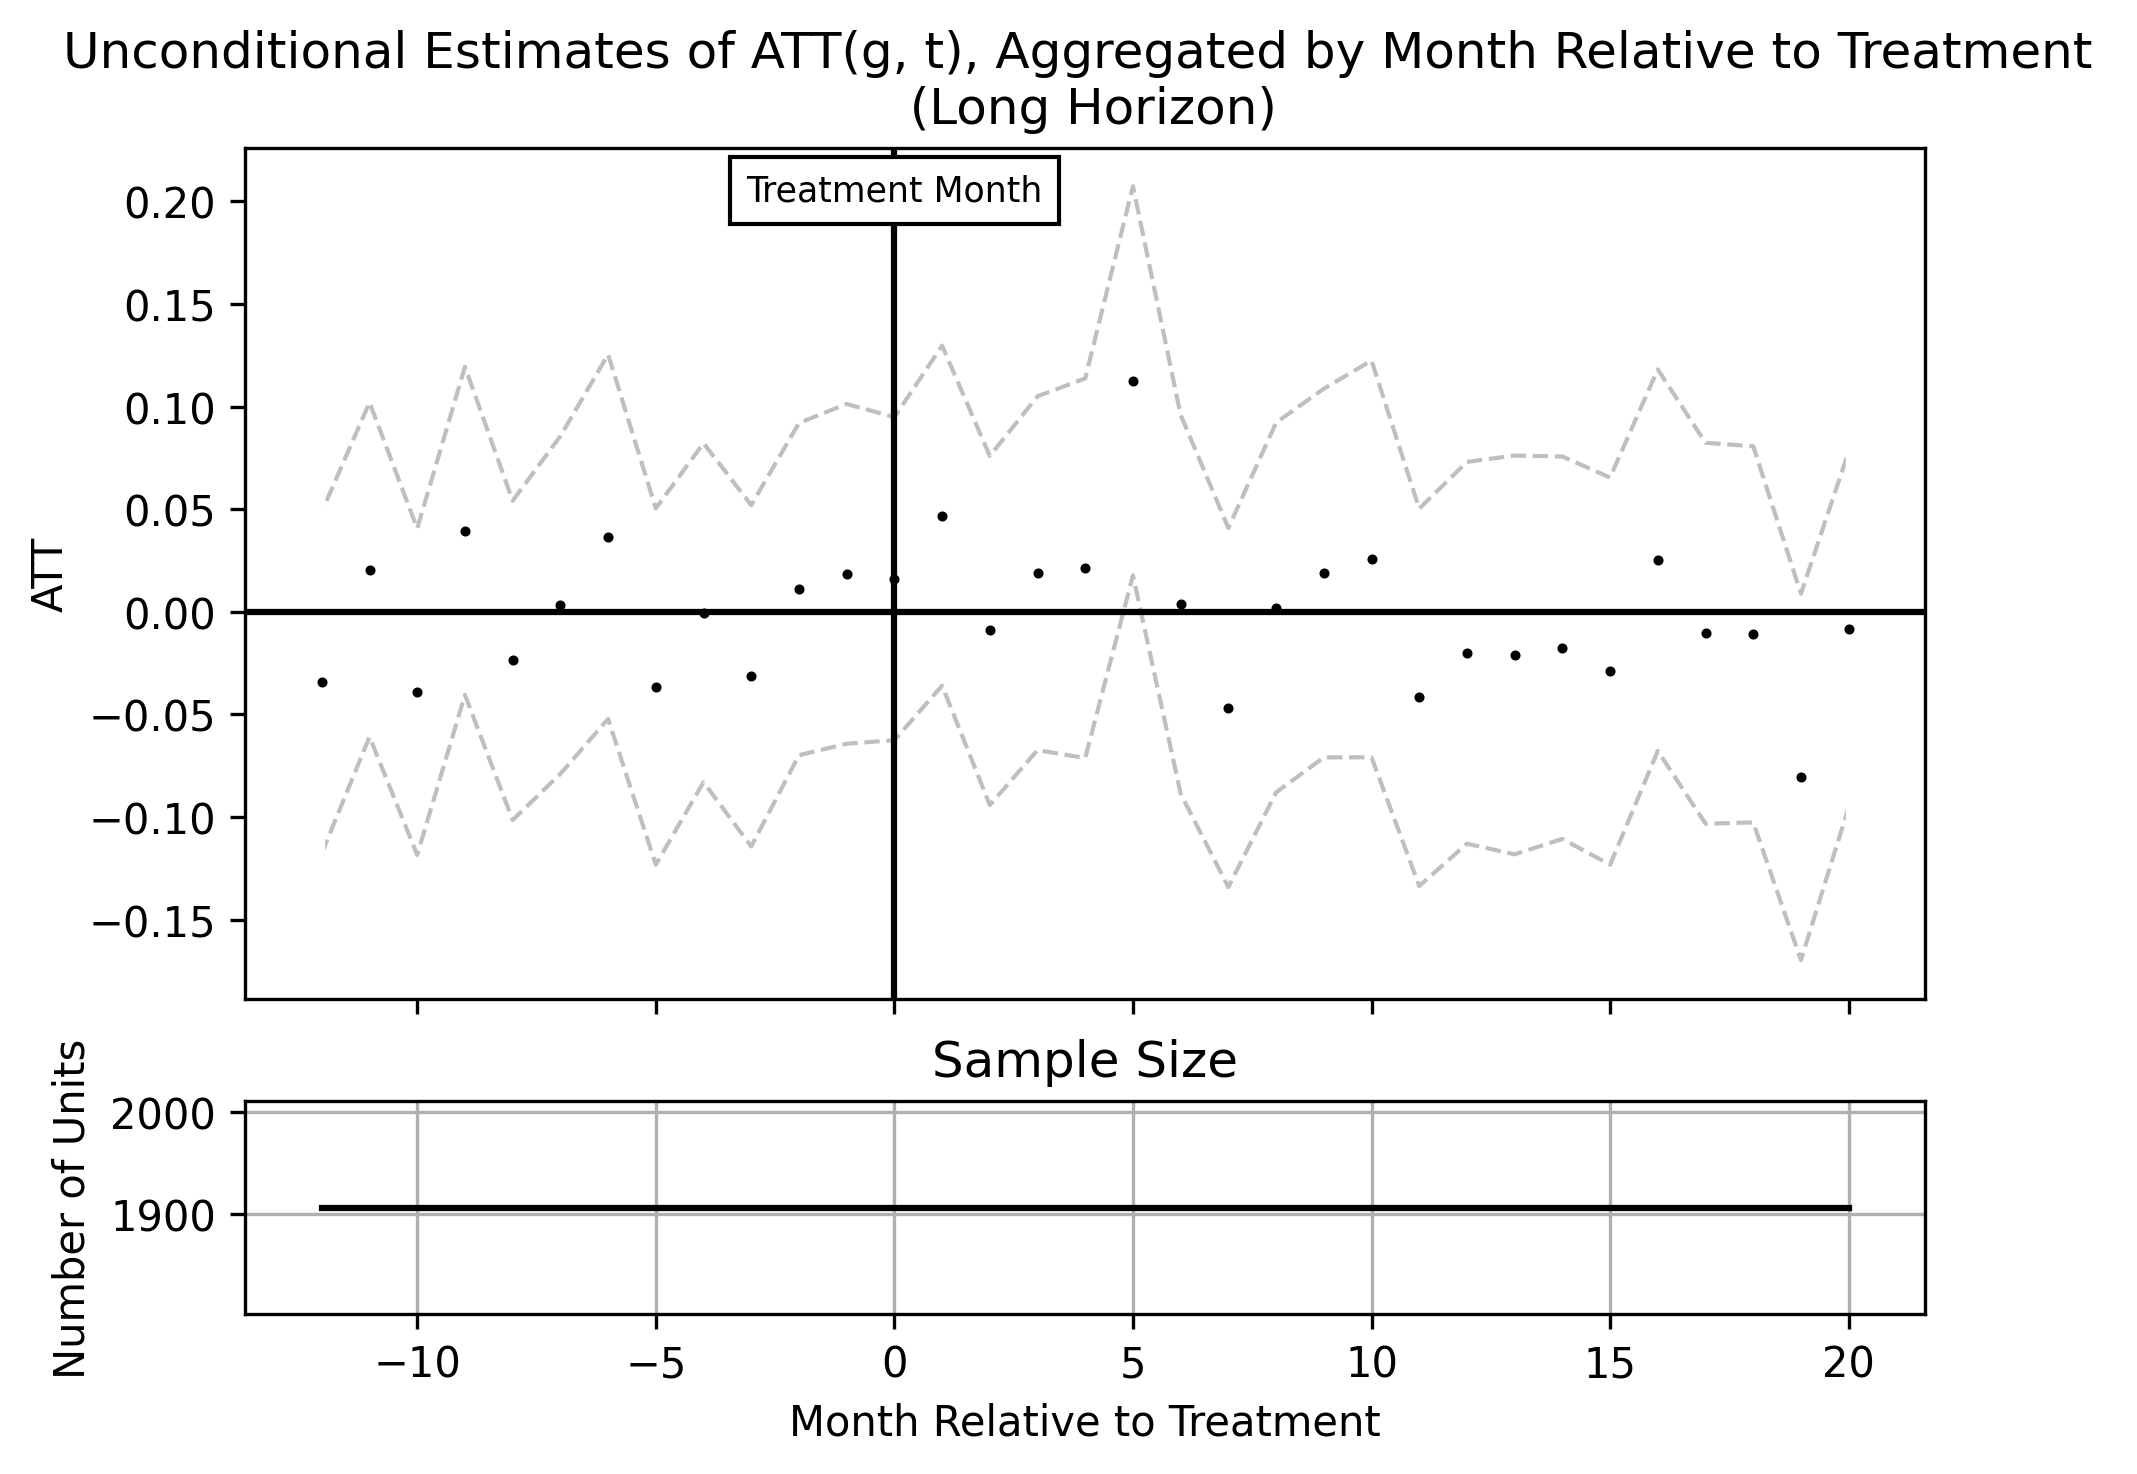

In [7]:
# Plot unconditional ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_unconditional_event_study_long_horizon.png",
                                 start_period=-12, end_period=20,
                                 title="Unconditional Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

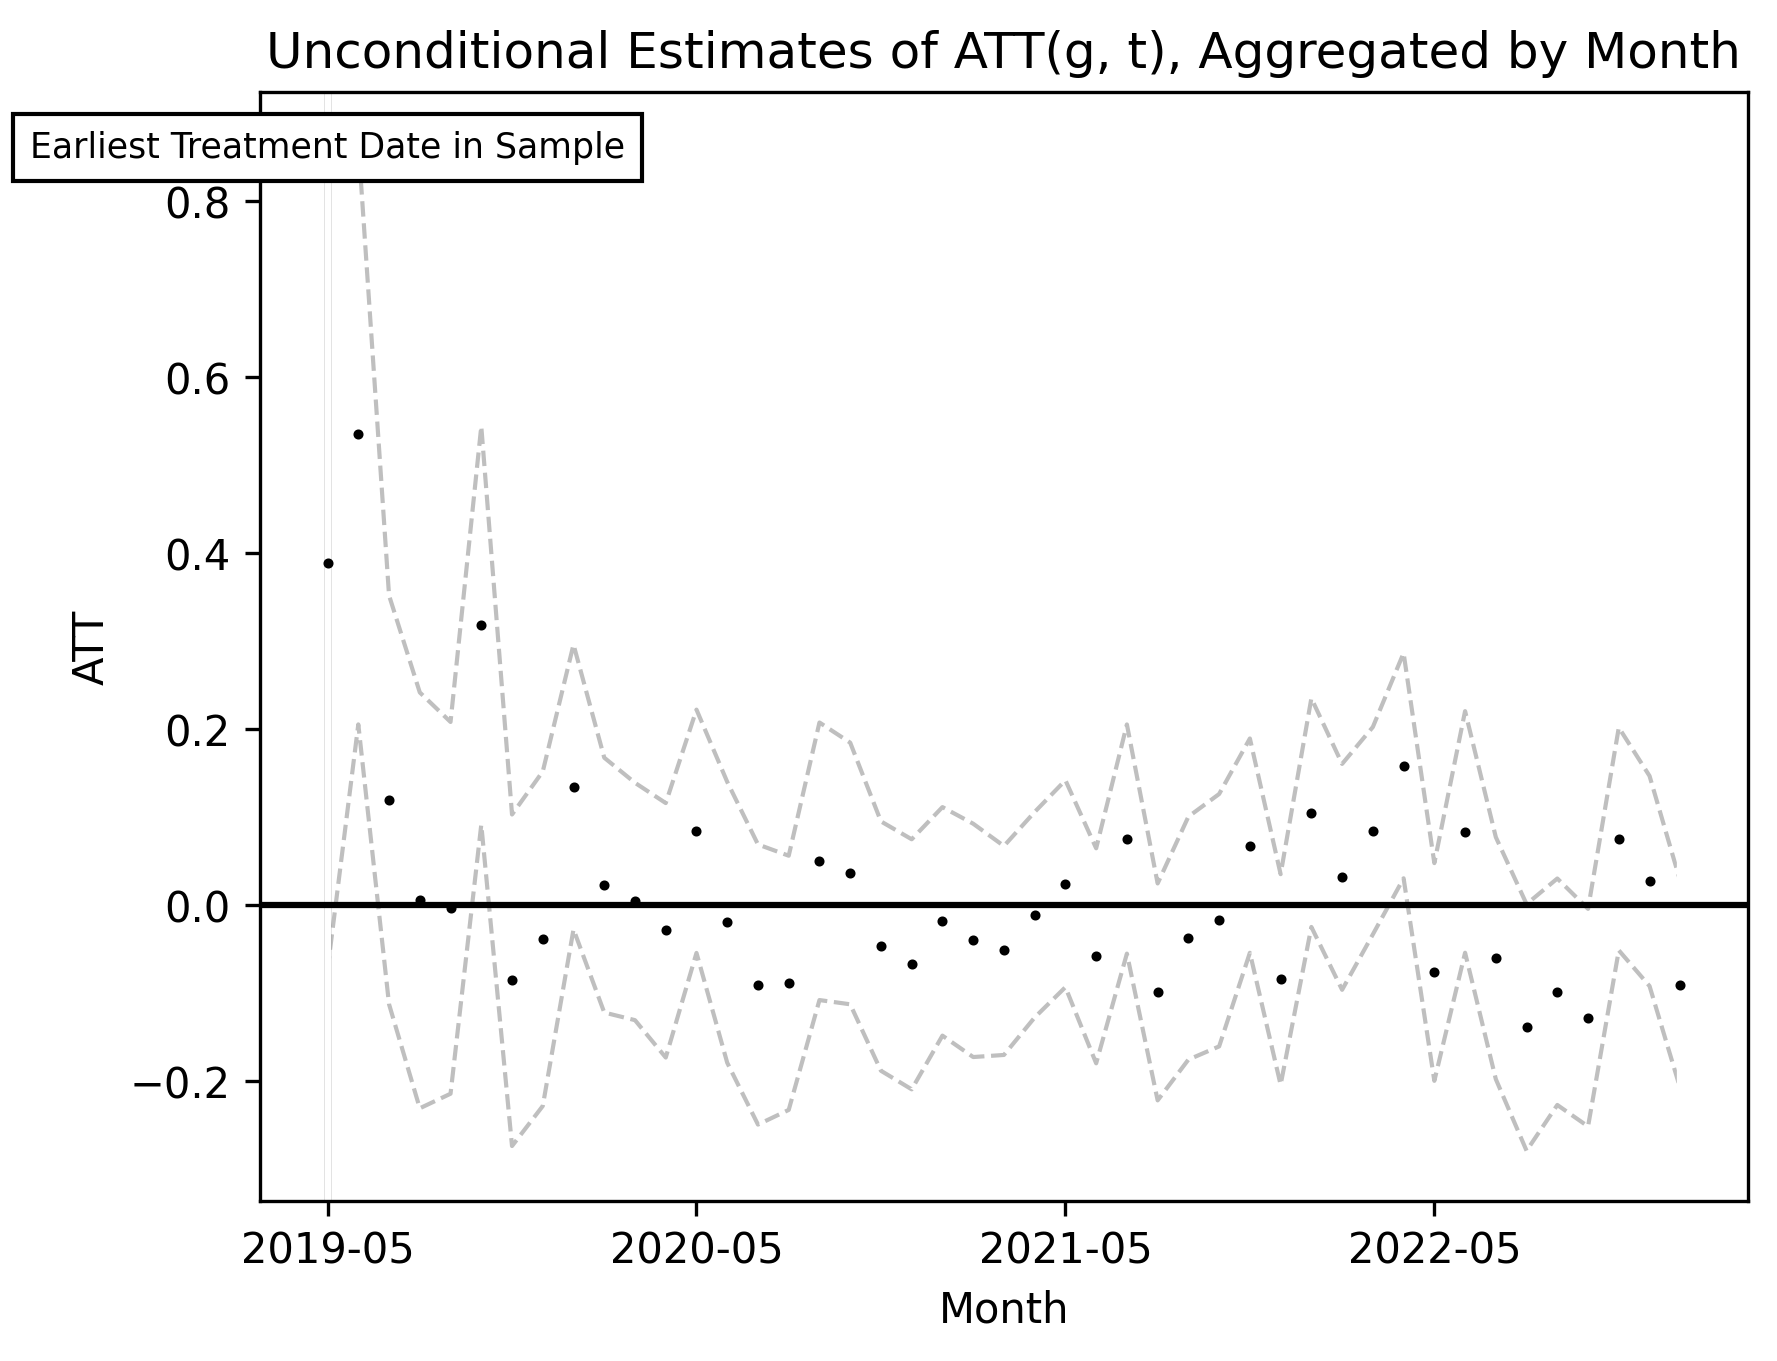

In [8]:
# Plot unconditional ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_unconditional_time.png",
                           title="Unconditional Estimates of ATT(g, t), Aggregated by Month")

In [9]:
# Run DiD conditional on covariates.
att_gt = ATTgt(data=df, cohort_name=treatment_month_variable, freq='M')
formula = f'{analysis} ~ ' + '+'.join(pre_treatment_covariates)
result = att_gt.fit(formula=formula, control_group='never_treated', n_jobs=-1)

Computing ATTgt [workers=10]   54%|██████████▊         | 1177/2184 [00:26<00:19, 50.86it/s]/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:27: RuntimeWarning: divide by zero encountered in divide
  w_cont = weights * ps_fit * ((1 - treated) / (1 - ps_fit))
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:33: RuntimeWarning: invalid value encountered in scalar divide
  eta_cont = np.mean(dr_att_cont) / np.mean(w_cont)
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/venv/lib/python3.9/site-packages/differences/did/att_if.py:90: RuntimeWarning: invalid value encountered in matmul
  inf_cont_3 = asy_lin_rep_wols @ M3[:, None]
/Users/arjunshanmugam/Documents/GitHub/seniorthesis/v

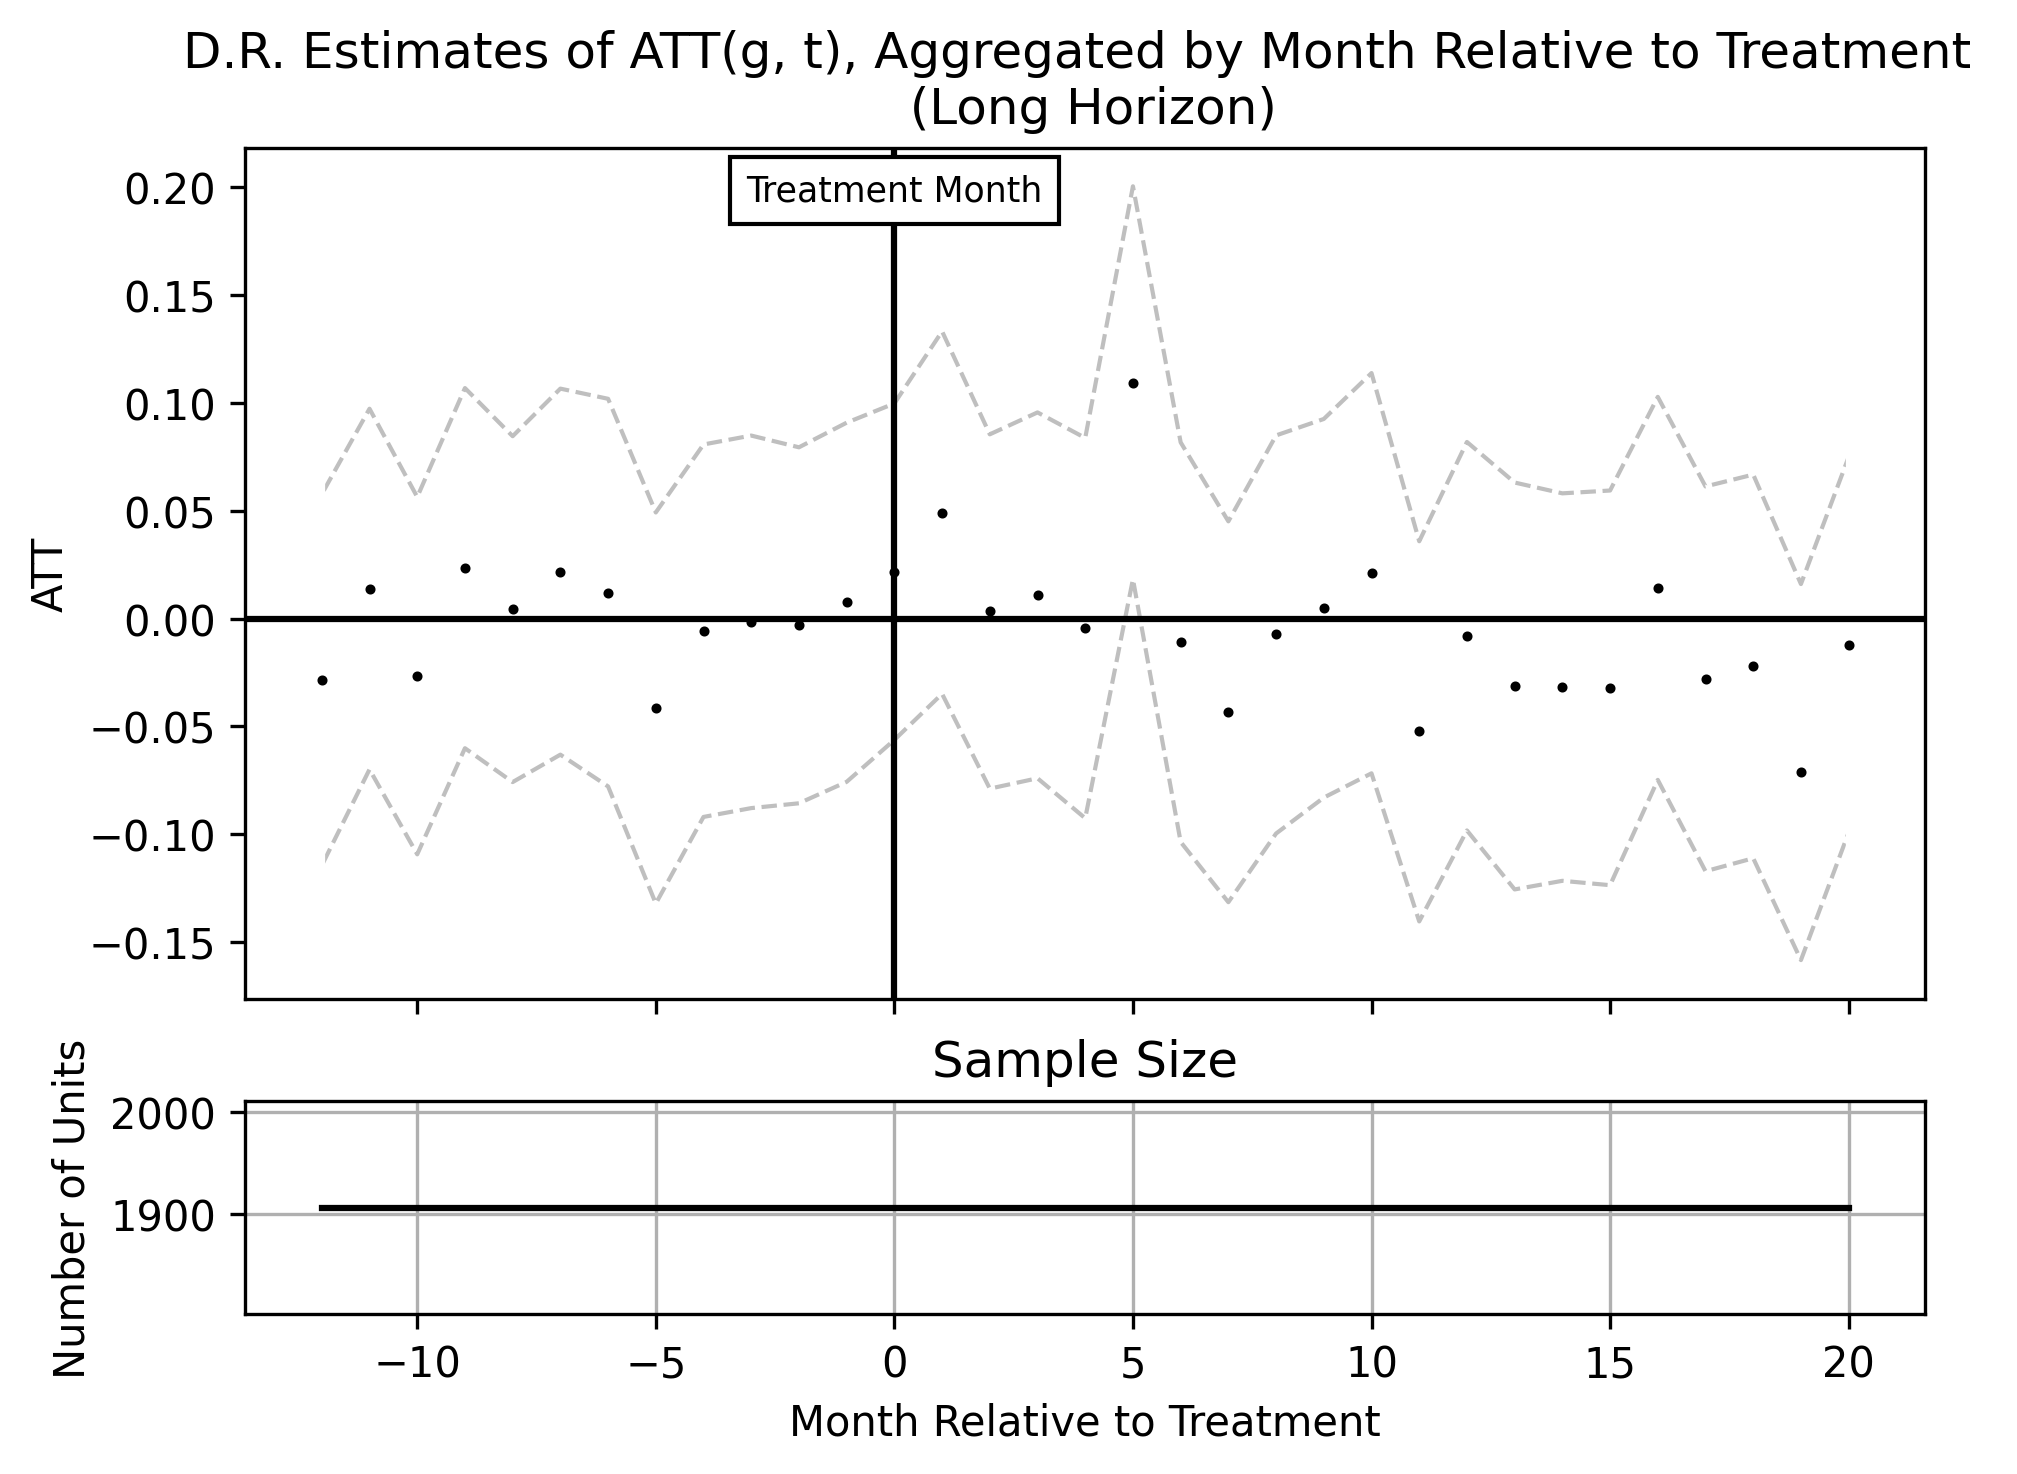

In [10]:
# Plot D.R. ATT(t-g)s on a long horizon.
aggregate_by_event_time_and_plot(att_gt, OUTPUT_FIGURES, "att_gt_dr_event_study_long_horizon.png", start_period=-12,
                                 end_period=20,
                                 title="D.R. Estimates of ATT(g, t), Aggregated by Month Relative to Treatment \n (Long Horizon)",
                                 treatment_month_variable=treatment_month_variable, df=df)

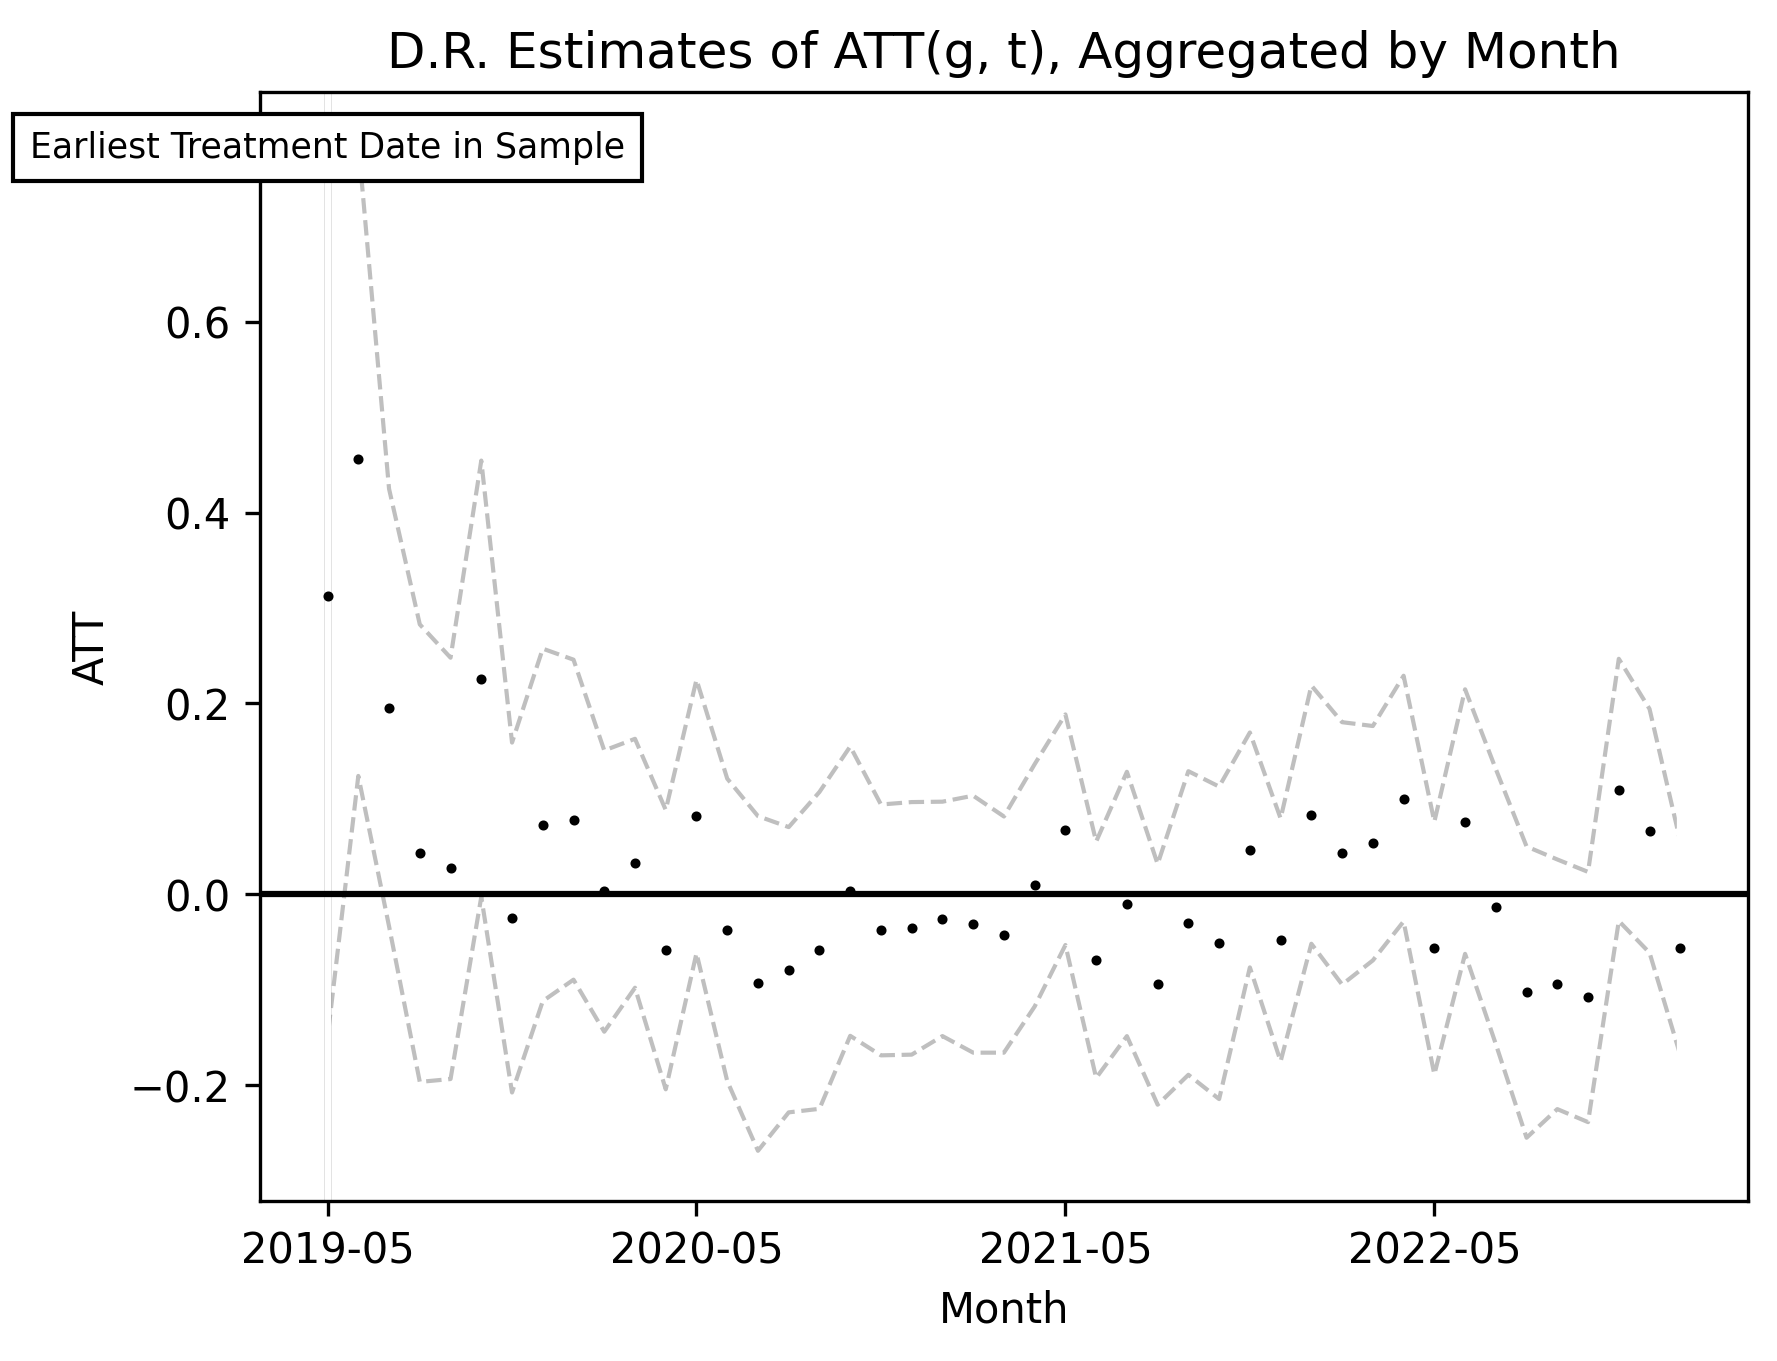

In [11]:
# Plot D.R. ATT(t)s.
aggregate_by_time_and_plot(att_gt, int_to_month_dictionary, OUTPUT_FIGURES, "att_gt_dr_time.png",
                           title="D.R. Estimates of ATT(g, t), Aggregated by Month")